## Task 1: Linear Discriminants. (Based on material of Lecture V)

### 1. Assume you have two classes (or two clusters). The points for the one class/cluster are sampled from the Gaussian distribution with the mean1 [0,4], for the second class with the mean2 [3,3], the covariance matrix [[0.3, 0.2], [0.2, 0.2]] is the same for both distributions.  

### 2. Create 300 sample for each class and visualise them.  

### 3. Implement least-square classification method (only linear discriminant functions without any generalisation).   

### 4. Using your implementation find and visualise the decision boundary which separates these two classes 
        a) Add outliers, namely too correct data points. Visualise how your decision boundary will be changed. (see how it is demonstrated in the slide 28) 
        b) Add outliers, namely misclassified data points. Show that your decision boundary is sensitive to outliers.

* member1 = mkolpe2s = Manoj Kolpe Lingappa
* member2 = psharma2s = Proonet Sharma

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors
from scipy import linalg
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression

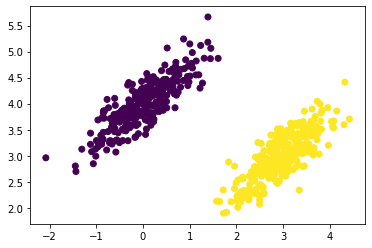

In [59]:
mean = np.array([[0, 4],
                 [3, 3]])

cov = np.array([[0.3, 0.2],
                [0.2, 0.2]])

samples =np.zeros((1,2))
no_of_samples = 300
for i in range(len(mean)):
    samples = np.concatenate([samples, np.random.multivariate_normal(mean[i], cov, no_of_samples)]) 
    
samples = samples[1:, :]
labels = np.ones(len(samples), dtype=int)
labels[:no_of_samples] = -1
plt.scatter(samples[:,0], samples[:,1], c=labels)

In [42]:
outliers = np.zeros((50,2))
for i in range(len(outliers)):
    for j in range(2):
        if j == 0:
            outliers[i][j] = 10 + np.random.random(1)
        else:
            outliers[i][j] = 1 + np.random.random(1)
            
new_sample = np.vstack((samples, outliers))

In [43]:
def least_square(samples, no_of_samples):
    labels = np.ones(len(samples), dtype=int)
    labels[:no_of_samples] = -1
    
    ones = np.ones(len(samples), dtype=int)
    X = np.array((ones, samples[:,0], samples[:,1])).T

    beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)),np.matmul(X.T, labels))
    
    return beta, labels

In [44]:
beta, labels = least_square(samples, 300)
x = np.linspace(-1, 5)
y = -beta[0]/beta[2] - (beta[1]/beta[2])*x

for i in range(len(x)):
    x[i] += random.randrange(-2,2)/10
    y[i] += random.randrange(-2,2)/10

correct_outliers = np.hstack((x[np.newaxis].T, y[np.newaxis].T))
correct_outliers_sample = np.vstack((samples, correct_outliers))

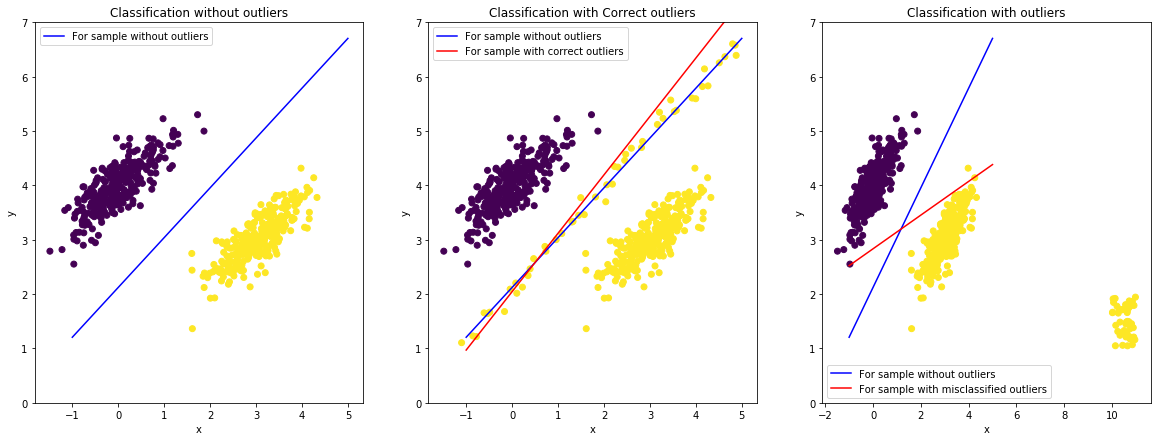

In [45]:
beta, labels = least_square(samples, 300)
beta_a, labels_a = least_square(correct_outliers_sample, 300)

beta_b, labels_b = least_square(new_sample, 300)
x = np.linspace(-1, 5)

y = -beta[0]/beta[2] - (beta[1]/beta[2])*x
y_a = -beta_a[0]/beta_a[2] - (beta_a[1]/beta_a[2])*x
y_b = -beta_b[0]/beta_b[2] - (beta_b[1]/beta_b[2])*x

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,7))
ax1.scatter(samples[:,0], samples[:,1], c=labels)
ax1.plot(x, y, c='b', label='For sample without outliers')
ax1.set_ylim([0, 7])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('Classification without outliers')
ax1.legend()

ax2.scatter(correct_outliers_sample[:,0], correct_outliers_sample[:,1], c=labels_a)
ax2.plot(x, y, c='b', label='For sample without outliers')
ax2.plot(x, y_a, c='r', label='For sample with correct outliers')
ax2.set_ylim([0, 7])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.title.set_text('Classification with Correct outliers')
ax2.legend()

ax3.scatter(new_sample[:,0], new_sample[:,1], c=labels_b)
ax3.plot(x, y, c='b', label='For sample without outliers')
ax3.plot(x, y_b, c='r', label='For sample with misclassified outliers')
ax3.set_ylim([0, 7])
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.title.set_text('Classification with outliers')
ax3.legend()

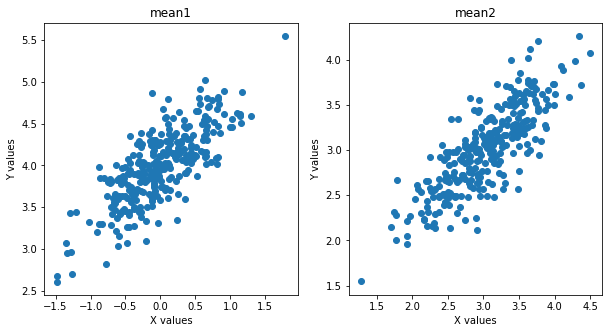

(-1.79044960763044, 4.810152295657481, 1.3223391853845217, 5.753483673490009)

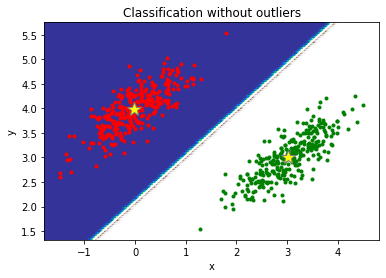

In [46]:
mean1 = [0,4]
mean2 = [3,3]
cov = [[0.3,0.2],[0.2,0.2]]
x1, y1 = np.random.multivariate_normal(mean1, cov, 300).T
x2, y2 = np.random.multivariate_normal(mean2, cov, 300).T
f = plt.figure(figsize=(10,5))
f.add_subplot(1,2, 1,title='mean1')
plt.scatter(x1,y1)
plt.xlabel("X values")
plt.ylabel("Y values")
f.add_subplot(1,2, 2,title='mean2')
plt.scatter(x2,y2)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

#  X is the x and y coordinates and y is the class 0 and 1
X = []
y = []
for i,j in zip(x1,y1):
        k = []
        k.append(i)
        k.append(j)
        X.append(k)
        y.append(0)
for i,j in zip(x2,y2):
        k = []
        k.append(i)
        k.append(j)
        X.append(k)
        y.append(1)
        
X = np.asarray(X)
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

def plot_data(lda, X, y, y_pred, fig_index,title):
    
    split =300
    cluster1,cluster2 = X[:split,:],X[split:,:]
    plt.scatter(cluster1[:,0],cluster1[:,1],marker='.', color='red')
    plt.scatter(cluster2[:,0],cluster2[:,1],marker='.', color='green')
    
    # class 0 and 1 : areas
    nx, ny = 300, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='terrain',
                   norm=colors.Normalize(0., 1.), zorder=0)


    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)

    return None

y_pred = clf.fit(X, y).predict(X)
splot = plot_data(clf, X, y, y_pred, _,'Classification without outliers')
plt.axis('tight')

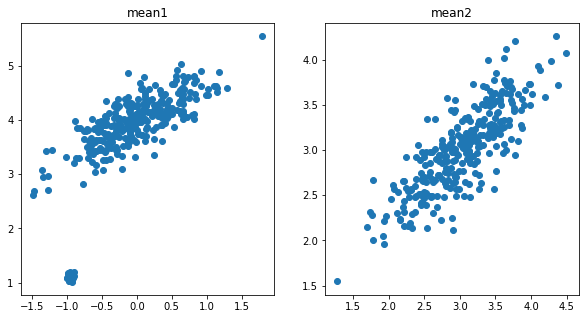

(-1.79044960763044, 4.810152295657481, 0.7642347771887412, 5.780060073880284)

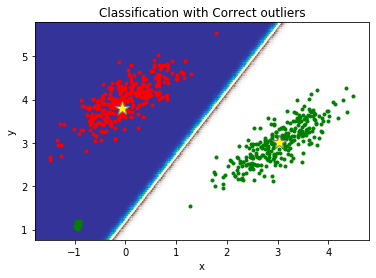

In [47]:
x_outliers = np.random.uniform(low=-0.9, high=-1, size=(20,))
y_outliers = np.random.uniform(low=1, high=1.2, size=(20,))
for i,j in zip(x_outliers,y_outliers):
    x1 = np.append(x1,i)
    y1 = np.append(y1,j)

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2, 1,title='mean1')
plt.scatter(x1,y1)
f.add_subplot(1,2, 2,title='mean2')
plt.scatter(x2,y2)
plt.show()

X = []
y = []
for i,j in zip(x1,y1):
        k = []
        k.append(i)
        k.append(j)
        X.append(k)
        y.append(0)
for i,j in zip(x2,y2):
        k = []
        k.append(i)
        k.append(j)
        X.append(k)
        y.append(1)
X = np.asarray(X)
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

y_pred = clf.fit(X, y).predict(X)
splot = plot_data(clf, X, y, y_pred, _, 'Classification with Correct outliers')
plt.axis('tight')

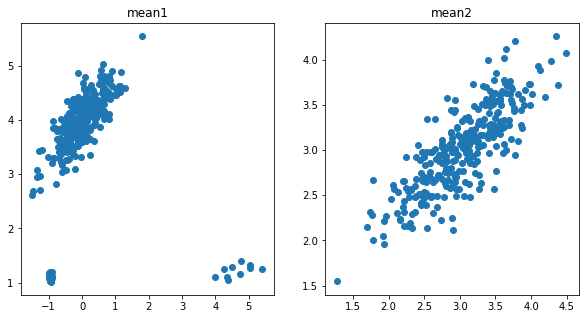

(-1.8362809582646564,
 5.7726106589760295,
 0.7642347771887412,
 5.780060073880284)

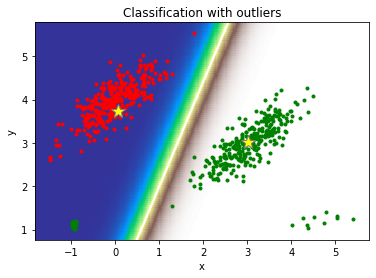

In [49]:
x_outliers = np.random.uniform(low=5.5, high=4, size=(10,))
y_outliers = np.random.uniform(low=1, high=1.5, size=(10,))
x1_new = x1
y1_new = y1
for i,j in zip(x_outliers,y_outliers):
    x1_new = np.append(x1_new,i)
    y1_new = np.append(y1_new,j)

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2, 1,title='mean1')
plt.scatter(x1_new,y1_new)
f.add_subplot(1,2, 2,title='mean2')
plt.scatter(x2,y2)
plt.show()

X = []
y = []
for i,j in zip(x1_new,y1_new):
        k = []
        k.append(i)
        k.append(j)
        X.append(k)
        y.append(0)
for i,j in zip(x2,y2):
        k = []
        k.append(i)
        k.append(j)
        X.append(k)
        y.append(1)
X = np.asarray(X)
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

y_pred = clf.fit(X, y).predict(X)
splot = plot_data(clf, X, y, y_pred, _, 'Classification with outliers')
plt.axis('tight')

## Task 1: Implement Logistic Regression from scratch. (Based on material from Lecture VI)

### 1. Implement Logistic Regression algorithm and apply it to the diagnosis.csv dataset. (Here take the dimension "diagnosis" as label).

### 2. Compare your implementation with the existing logistic regression algorithm given in python.

### 3. Apply either your implementation or the python one to the other given data sets: purchased.csv (dimension 'purchased' includes labels) and advertising.csv (dimension 'Clicked on Ad' includes labels)

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

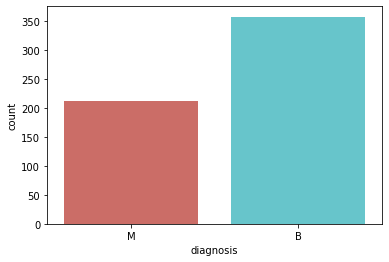

<Figure size 432x288 with 0 Axes>

In [51]:
df = pd.read_csv("diagnosis.csv")
df['diagnosis'].value_counts()
sns.countplot(x ='diagnosis', data =df, palette='hls')
plt.show()
plt.savefig('count_plot')
df = df.drop('Unnamed: 32', 1)
df = df.drop('id',1)
pd.set_option('display.max_columns', 5000)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

df1 = train.loc[:,'diagnosis']
df2 = train.loc[:, 'radius_mean':'fractal_dimension_worst']
df3 = test.loc[:,'diagnosis']
df4 = test.loc[:, 'radius_mean':'fractal_dimension_worst']

In [52]:
class LogisticRegression_scratch:
    def __init__(self, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [53]:
def LogisticRegression_common(df1,df2,df3,df4,num_iter):
    model = LogisticRegression_scratch(lr=0.1, num_iter=num_iter)
    %time model.fit(df2, df1)
    preds = model.predict(df4,threshold=0.5)
    # accuracy
    print("Accuracy of scratch logistic regression {}".format((preds == df3).mean()))
    
def logistic_regression_sklearn(df1,df2,df3,df4):
    model = LogisticRegression(C=1e20)
    %time model.fit(df2, df1)
    preds = model.predict(df4)
    # accuracy
    print("Accuracy of sklearn logistic regression {}".format((preds == df3).mean()))
    k = ((preds == df3).mean())
#     print(type(k))
    return k

In [54]:
LogisticRegression_common(df1,df2,df3,df4,50000)
logistic_regression_sklearn(df1,df2,df3,df4)

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


CPU times: user 40.9 s, sys: 0 ns, total: 40.9 s
Wall time: 41 s
Accuracy of scratch logistic regression 0.9074074074074074
CPU times: user 105 ms, sys: 1.56 ms, total: 106 ms
Wall time: 55.7 ms
Accuracy of sklearn logistic regression 0.9537037037037037


/home/manoj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9537037037037037

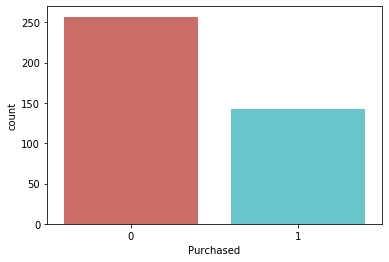

CPU times: user 13.2 ms, sys: 3.96 ms, total: 17.2 ms
Wall time: 12 ms
Accuracy of sklearn logistic regression 0.8222222222222222


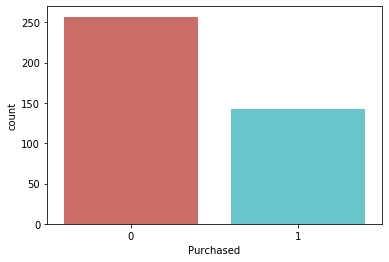

CPU times: user 22.4 ms, sys: 0 ns, total: 22.4 ms
Wall time: 14.5 ms
Accuracy of sklearn logistic regression 0.8831168831168831


<Figure size 432x288 with 0 Axes>

In [56]:
from sklearn.linear_model import LogisticRegression

k =0.6

# RUn until accuracy is greater than 88% 
while k<0.88:
    df = pd.read_csv("purchased.csv")
    # print(df)

    df['Purchased'].value_counts()
    sns.countplot(x ='Purchased', data =df, palette='hls')
    plt.show()
    plt.savefig('count_plot1')
    df = df.drop('User ID', 1)
    pd.set_option('display.max_columns', 5000)
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    
    # Normalising the data for better accuracy
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    df.columns = ['Gender', 'Age', 'EstimatedSalary', 'Purchased']
    # print(df.head())

    msk = np.random.rand(len(df)) < 0.8

    train = df[msk]

    test = df[~msk]

    df1 = train.loc[:,'Purchased']
    df2 = train.loc[:, 'Gender':'EstimatedSalary']
    df3 = test.loc[:,'Purchased']
    df4 = test.loc[:, 'Gender':'EstimatedSalary']

    k = logistic_regression_sklearn(df1,df2,df3,df4)
#     print(k)

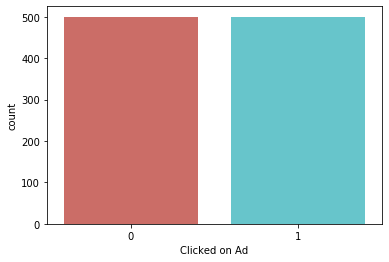

CPU times: user 65.8 ms, sys: 97 µs, total: 65.9 ms
Wall time: 35.9 ms
Accuracy of sklearn logistic regression 0.9317073170731708


0.9317073170731708

<Figure size 432x288 with 0 Axes>

In [57]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("advertising.csv")
# print(df)
df['Clicked on Ad'].value_counts()
sns.countplot(x ='Clicked on Ad', data =df, palette='hls')
plt.show()
plt.savefig('count_plot1')
df = df.drop('Ad Topic Line', 1)
df = df.drop('City', 1)
df = df.drop('Country', 1)
df = df.drop('Timestamp', 1)
pd.set_option('display.max_columns', 5000)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

df1 = train.loc[:,'Clicked on Ad']
df2 = train.loc[:, 'Daily Time Spent on Site':'Male']
df3 = test.loc[:,'Clicked on Ad']
df4 = test.loc[:, 'Daily Time Spent on Site':'Male']

logistic_regression_sklearn(df1,df2,df3,df4)

Refrence:
* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
* https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
* https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe